In [94]:
import pandas as pd

In [109]:
df_sets_brickset = pd.read_csv('sets-brickset.csv')

# change number to bricklink format
df_sets_brickset['Number'] = [
    f'{number}-{variant}' for number, variant 
    in zip(df_sets_brickset['Number'], df_sets_brickset['Variant'])
]

# change column names, filter columns
df_sets_brickset = df_sets_brickset.rename(
    columns={col: col.lower() for col in list(df_sets_brickset)}
)[['number', 'theme', 'year', 'name', 'minifigs', 'pieces', 'usprice']]

# make NaN minifigs 0.0
df_sets_brickset = df_sets_brickset.fillna(value={'minifigs': 0.0})

# set types
df_sets_brickset = df_sets_brickset.astype({
    'number': 'str',
    'year': 'str'
})

df_sets_brickset

,number,theme,year,name,minifigs,pieces,usprice
0,497-1,Space,1979,Galaxy Explorer,4.0,338.0,32.0
1,1072-1,Dacta,1979,Supplementary LEGO Set,0.0,304.0,16.3
2,1083-2,Dacta,1979,50 x 50 LEGO Gray Baseplate,0.0,1.0,10.0
3,1091-1,Dacta,1979,Lego Educational Storage Cloth,0.0,1.0,10.0
4,454-1,Space,1979,Two Lunar Landing Plates,0.0,2.0,5.0
...,...,...,...,...,...,...,...
14747,ST-1,Stranger Things,2019,Castle Byers,0.0,48.0,NaN
14748,STORMBREAKER-1,Marvel Super Heroes,2019,Stormbreaker,0.0,27.0,NaN
14749,TANTIVEIV-1,Star Wars,2019,Tantive IV,0.0,NaN,NaN
14750,TITW-1,Promotional,2019,Tree in the Woods,0.0,53.0,NaN


In [110]:
df_sets_bricklink = pd.read_csv('sets-bricklink.tsv', sep='\t')

# rename and filter columns
df_sets_bricklink = df_sets_bricklink.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'set_weight',
    }
)[['number', 'set_weight']]

# filter out sets without weight data
df_sets_bricklink = df_sets_bricklink[df_sets_bricklink['set_weight'] != '?']

# set types
df_sets_bricklink = df_sets_bricklink.astype({
    'number': 'str',
    'set_weight': 'float'
})

df_sets_bricklink

,number,set_weight
8,041-2,569.0
11,101-1,74.0
15,1029-1,142.0
17,1030-1,1189.0
18,1031-1,277.0
...,...,...
15568,75964-21,13.0
15569,75964-22,7.0
15570,75964-23,12.0
15571,75964-24,5.0


In [111]:
df_boxes = pd.read_csv('boxes-bricklink.tsv', sep='\t')

# rename and filter columns
df_boxes = df_boxes.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'box_weight'
    }
)[['number', 'box_weight']]

# filter out sets without weight data
df_boxes = df_boxes[df_boxes['box_weight'] != '?']

# set types
df_boxes = df_boxes.astype({
    'number': 'str',
    'box_weight': 'float'
})

df_boxes

,number,box_weight
3,367-1,134.00
5,2164-1,0.45
8,217-2,41.00
9,603-2,3.00
11,293-1,30.00
...,...,...
15420,911951-1,1.50
15422,BIL01-1,14.00
15441,11920-1,2.00
15442,111903-2,1.50


In [112]:
df_instructions = pd.read_csv('instructions-bricklink.tsv', sep='\t')

# rename and filter columns
df_instructions = df_instructions.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'instruction_weight'
    }
)[['number', 'instruction_weight']]

# filter out instructions without weight
df_instructions = df_instructions[df_instructions['instruction_weight'] != '?']

# set types
df_instructions = df_instructions.astype({
    'number': 'str',
    'instruction_weight': 'float'
})

df_instructions

,number,instruction_weight
0,8470-1,102.00
2,691-1,3.40
3,367-1,20.00
8,293-1,3.40
9,645-2,3.40
...,...,...
9231,col19-14,2.38
9232,col19-15,2.38
9233,col19-16,2.38
9235,GA11NoDk-99,9.00


In [187]:
df_sets_inventory = pd.read_csv('sets-bricklink-inventory-derived.csv')
df_sets_inventory['parts_weight_inv'] = df_sets_inventory['parts_weight']

In [114]:
# make a dictionary to compute inflation-adjusted prices

df_inflation = pd.read_csv('inflation.csv')
dollar_2019 = df_inflation['amount'].tolist()[-1]
dict_inflation = {
    str(year): dollar_2019 / amount for year, amount in zip(df_inflation['year'], df_inflation['amount'])
}

dict_inflation

{'1979': 3.5338567493112953,
 '1980': 3.113567961165048,
 '1981': 2.8224202420242026,
 '1982': 2.658632124352332,
 '1983': 2.5758835341365462,
 '1984': 2.469278152069298,
 '1985': 2.384368029739777,
 '1986': 2.340857664233577,
 '1987': 2.2584330985915497,
 '1988': 2.1687066779374473,
 '1989': 2.069016129032258,
 '1990': 1.9629533282325937,
 '1991': 1.8836857562408222,
 '1992': 1.8286386315039205,
 '1993': 1.7754878892733565,
 '1994': 1.731160593792173,
 '1995': 1.683451443569554,
 '1996': 1.63516889738687,
 '1997': 1.598492211838006,
 '1998': 1.5739754601226996,
 '1999': 1.539963985594238,
 '2000': 1.4898838559814174,
 '2001': 1.4486617730095992,
 '2002': 1.4261145080600333,
 '2003': 1.3943369565217392,
 '2004': 1.3581683430386449,
 '2005': 1.3136610343061954,
 '2006': 1.272609126984127,
 '2007': 1.2373662837244745,
 '2008': 1.1916136793263448,
 '2009': 1.195868311759743,
 '2010': 1.176569321642147,
 '2011': 1.1405669981639468,
 '2012': 1.1174420934344977,
 '2013': 1.1013105422889202,


In [665]:
# join it all together!
df_merged = (
    df_sets_brickset
        .merge(df_sets_bricklink, how='left', on='number')
        .merge(df_boxes, how='left', on='number')
        .merge(df_instructions, how='left', on='number')
        .merge(df_sets_inventory, how='left', on='number')
)

# filter out sets with NaN prices, missing weights
df_merged = df_merged.dropna()

# add inflation-adjusted price
df_merged['adjusted_price'] = [
    price * dict_inflation[year] for price, year in zip(df_merged['usprice'], df_merged['year'])
]

# filter out sets with fewer than 25 pieces
df_merged = df_merged[df_merged['pieces'] > 25]

# filter out sets with more than 5% missing parts
# df_merged = df_merged[df_merged['pct_missing_parts'] < 0.05]

# remove sets with price less than 1 dollar
df_merged[df_merged['adjusted_price'] >= 1.0]

# remove weird themes
excluded_themes=[
    'Clickits'
    'Dimensions',
    'Duplo',
    'Education',
    'Mindstorms',
    'Quatro',
]
df_merged = df_merged[~df_merged['theme'].isin(excluded_themes)]

# remove recent sets with incorrect minifig counts
excluded_numbers=[
    '75252-1',
    '71044-1',
    '75936-1',
    '70425-1',
    '10267-1',
    '76122-1',
    '21155-1',
]
df_merged = df_merged[~df_merged['number'].isin(excluded_numbers)]

# add basic estimate of parts weight
df_merged['parts_weight_est'] = df_merged['set_weight'] - (df_merged['box_weight'] + df_merged['instruction_weight'])

df_merged = df_merged.reset_index(drop=True)
df_merged

,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,num_part_types,num_parts,parts_weight,num_missing_parts,pct_missing_parts,parts_weight_inv,adjusted_price,parts_weight_est
0,8858-2,Technic,1980,Auto Engines,0.0,460.0,69.00,513.0,133.00,100.0,47.0,248.0,215.29,0.0,0.000000,215.29,214.836189,280.00
1,744-1,Basic,1980,"Universal Building Set with Motor, 7+",0.0,537.0,59.00,1338.0,316.00,90.0,129.0,568.0,1234.91,3.0,0.005282,1234.91,183.700510,932.00
2,6970-1,Space,1980,Beta I Command Base,4.0,264.0,37.00,1030.0,360.00,34.0,102.0,260.0,594.78,4.0,0.015385,594.78,115.202015,636.00
3,722-1,Basic,1980,"Universal Building Set, 7+",0.0,301.0,20.00,741.0,182.00,52.0,101.0,316.0,410.12,0.0,0.000000,410.12,62.271359,507.00
4,5233-1,Homemaker,1980,Bedroom,1.0,26.0,4.50,406.0,144.24,6.0,63.0,160.0,334.43,1.0,0.006250,334.43,14.011056,255.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,41357-1,Friends,2019,Olivia's Heart Box,2.0,85.0,7.99,129.0,36.00,17.0,39.0,85.0,63.24,2.0,0.023529,63.24,7.990000,76.00
3460,41358-1,Friends,2019,Mia's Heart Box,1.0,83.0,7.99,117.0,39.00,16.0,42.0,88.0,64.87,1.0,0.011364,64.87,7.990000,62.00
3461,41384-1,Friends,2019,Andrea's Summer Heart Box,1.0,83.0,7.99,129.0,46.00,16.0,51.0,88.0,64.36,1.0,0.011364,64.36,7.990000,67.00
3462,30362-1,City,2019,Sky Police Jetpack,2.0,33.0,3.99,24.4,2.00,3.7,23.0,29.0,10.64,2.0,0.068966,10.64,3.990000,18.70


In [666]:
# take a peek at what we're working with
display(df_merged[df_merged['year'] == '2019'])

,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,num_part_types,num_parts,parts_weight,num_missing_parts,pct_missing_parts,parts_weight_inv,adjusted_price,parts_weight_est
3279,70840-1,The Lego Movie 2: The Second Part,2019,Welcome to Apocalypseburg!,13.0,3178.0,299.99,5329.0,633.00,867.0,722.0,3201.0,3560.174,13.0,0.004061,3560.174,299.99,3829.00
3280,10264-1,Creator Expert,2019,Corner Garage,6.0,2569.0,199.99,3035.0,466.00,406.0,629.0,2639.0,2160.680,6.0,0.002274,2160.680,199.99,2163.00
3281,75810-1,Stranger Things,2019,The Upside Down,8.0,2287.0,199.99,3323.0,732.00,544.0,581.0,2343.0,1998.899,8.0,0.003414,1998.899,199.99,2047.00
3282,10265-1,Creator Expert,2019,Ford Mustang,0.0,1471.0,149.99,1820.0,319.00,426.0,394.0,1521.0,1171.607,0.0,0.000000,1171.607,149.99,1075.00
3283,42096-1,Technic,2019,Porsche 911 RSR,0.0,1580.0,149.99,2270.0,292.00,579.0,197.0,1609.0,1546.400,4.0,0.002486,1546.400,149.99,1399.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,41357-1,Friends,2019,Olivia's Heart Box,2.0,85.0,7.99,129.0,36.00,17.0,39.0,85.0,63.240,2.0,0.023529,63.240,7.99,76.00
3460,41358-1,Friends,2019,Mia's Heart Box,1.0,83.0,7.99,117.0,39.00,16.0,42.0,88.0,64.870,1.0,0.011364,64.870,7.99,62.00
3461,41384-1,Friends,2019,Andrea's Summer Heart Box,1.0,83.0,7.99,129.0,46.00,16.0,51.0,88.0,64.360,1.0,0.011364,64.360,7.99,67.00
3462,30362-1,City,2019,Sky Police Jetpack,2.0,33.0,3.99,24.4,2.00,3.7,23.0,29.0,10.640,2.0,0.068966,10.640,3.99,18.70


In [406]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [667]:
def process_set_data(
    df_sets, features, target, start_year='1979', end_year='2020'
):

    df = df_sets.copy()

    # deal with theme if included in model
    if 'theme' in features:
        # remove themes with fewer than 2 sets
        theme_counts = df.groupby('theme').count()
        small_themes = list(theme_counts[theme_counts['number'] < 2].index)
        df = df[~df['theme'].isin(small_themes)]

        # one-hot encode theme
        col_theme = df['theme']
        df = pd.get_dummies(df, columns=['theme'])
        df['theme'] = col_theme
        
        # include one-hot columns in model
        model_features = [f for f in features if f != 'theme'] + [
            f for f in list(df) if 'theme_' in f 
        ]
    else:
        model_features = features
    
    df = df.reset_index(drop=True)
    
    return df, model_features



def train_test_split_(df_sets, target, stratify=None):
    df = df_sets.copy()
    
    df_X = df[[f for f in list(df) if f != target]]
    df_y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        df_X, df_y, train_size=0.8, stratify=stratify
    )
    
    return X_train, X_test, y_train, y_test

In [668]:
df_adj = df_merged.copy()

# filter years on stategic realignment
start_year = '2005'
end_year = '2020'
df_adj = df_adj[
    (df_adj['year'] <= end_year) &
    (df_adj['year'] >= start_year)
]


target = 'adjusted_price'

# only use sets since strategic re-alignment (2005)
# excluding sets because their minifig counts are wrong
df_processed, features = process_set_data(
    df_sets=df_adj,
    features=[
        'theme',
        'minifigs',
        'parts_weight_inv',
        'parts_weight_est',
        'num_part_types',
        'pieces',
    ],
    target=target,
)

X_train, X_test, y_train, y_test = train_test_split_(df_processed, target, stratify=df_processed['theme'])

In [669]:
# train model
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train[features], y_train)

imps = model.feature_importances_

print('\nFeature importances:')
display(sorted(list(zip(features, imps.tolist())), key=lambda elem: elem[1], reverse=True))


Feature importances:


[('parts_weight_est', 0.45309234449062546),
 ('parts_weight_inv', 0.36141954538333637),
 ('pieces', 0.1628778748859916),
 ('minifigs', 0.0059695554306167),
 ('theme_Star Wars', 0.004342445202042486),
 ('num_part_types', 0.003947138169471187),
 ('theme_Make and Create', 0.0011724519913656126),
 ('theme_Dimensions', 0.0009229487839626865),
 ('theme_Classic', 0.0008649691780214645),
 ('theme_Architecture', 0.0007625981457655123),
 ('theme_Technic', 0.0006125424019274602),
 ('theme_Exo-Force', 0.0004050434971313948),
 ('theme_Creator', 0.0003453745809565096),
 ('theme_Bricks and More', 0.0002986394286756657),
 ('theme_Racers', 0.0002722290595535442),
 ('theme_Avatar The Last Airbender', 0.00023262624525079314),
 ('theme_Creator Expert', 0.00022585374252138426),
 ('theme_The Simpsons', 0.00020170760874046719),
 ('theme_Batman', 0.00019021394738727725),
 ('theme_DC Comics Super Heroes', 0.00017735187832422018),
 ('theme_Master Builder Academy', 0.0001658145811856244),
 ('theme_The LEGO Ninja

In [670]:
# evaluate the model

y_pred = model.predict(X_test[features])

print(f'R-squared train {model.score(X_train[features], y_train)}')
print(f'R-squared test {model.score(X_test[features], y_test)}')

df_test = X_test.copy()

# re-adjust price for inflation
df_test['prediction'] = [
    round(float(price) / dict_inflation[year], 2)
    for price, year in zip(y_pred, df_test['year'])
]
df_test['price'] = [
    float(price) / dict_inflation[year]
    for price, year in zip(y_test, df_test['year'])
]
df_test['raw_deviation'] = df_test['prediction'] - df_test['price']

print('\nMedian absolute deviation: $', round(df_test['raw_deviation'].abs().median(), 2))

with pd.option_context('display.max_rows', None):
    display(df_test[[
        'name',
        'theme',
        'year',
        'price',
        'prediction',
        'raw_deviation',
        'minifigs',
        'pieces',
        'parts_weight_est'
    ]][:50])

R-squared train 0.9929479110275455
R-squared test 0.9518086082988476

Median absolute deviation: $ 2.11


,name,theme,year,price,prediction,raw_deviation,minifigs,pieces,parts_weight_est
192,The Batman Dragster: Catwoman Pursuit,Batman,2006,10.00,11.37,1.37,2.0,92.0,106.00
2054,Stay Puft,Dimensions,2016,11.99,12.99,1.00,1.0,65.0,33.20
722,Police Station,City,2011,99.99,107.35,7.36,6.0,783.0,1216.00
1089,Galactic Titan,Space,2013,99.99,106.37,6.38,5.0,1012.0,1161.00
2017,Lance's Mecha Horse,Nexo Knights,2016,19.99,23.21,3.22,3.0,237.0,169.20
295,Wheel Loader,Technic,2007,19.99,21.26,1.27,0.0,200.0,205.00
1796,Emma's Tourist Kiosk,Friends,2015,9.99,9.62,-0.37,1.0,98.0,66.90
1786,Painting Easter Eggs,Seasonal,2015,9.99,11.47,1.48,2.0,153.0,89.40
1263,Mandalorian Fighter,Star Wars,2013,4.99,6.19,1.20,0.0,49.0,27.70
1931,Fire Utility Truck,City,2016,39.99,44.18,4.19,3.0,368.0,381.00


In [671]:
# estimate the price of the new star destroyer

set_features={
    'minifigs': 2.0,
    'parts_weight_inv': 6800.0,
    'parts_weight_est': 6800.0,
    'num_parts': 4784.0,
    'num_part_types': 500.0,
    'theme': 'Star Wars'
}

def estimate_price(models, model_features, set_features):
    if 'theme' in set_features:
        set_features['theme_' + set_features['theme']] = 1
    features = {f: [set_features[f]] if f in set_features else [0] for f in model_features}
    df = pd.DataFrame(features)
    return sum([model.predict(df[model_features])[0] for model in models]) / len(models)

estimate_price([model], features, set_features)

558.1961640307139

In [675]:
from sklearn.model_selection import KFold

def k_fold_models(df, feautres, target, n_splits=10):
    df_X = df[[f for f in list(df) if f != target]]
    df_y = df[target]

    kf = KFold(n_splits=n_splits, shuffle=True)
    
    models = []

    for train_index, test_index in kf.split(df_X):
        X_train, X_test = df_X.iloc[train_index], df_X.iloc[test_index]
        y_train, y_test = df_y.iloc[train_index], df_y.iloc[test_index]
        
        model = GradientBoostingRegressor(n_estimators=300)
        model.fit(X_train[features], y_train)

        y_pred = model.predict(X_test[features])

        print(f'R-squared {model.score(X_test[features], y_test)}')
        
        models.append(model)
    
    return models

        
models = k_fold_models(df_processed, features, target)

for m in models:
    display(
        sorted(
            list(zip(features, m.feature_importances_.tolist())), 
            key=lambda elem: elem[1], 
            reverse=True
        )[:5]
    )

R-squared 0.9188428512202337
R-squared 0.944595033717016
R-squared 0.970890487786513
R-squared 0.9505122614600617
R-squared 0.9477465907754544
R-squared 0.9404614719549049
R-squared 0.9471975360309375
R-squared 0.9416037139653232
R-squared 0.9590446413318563
R-squared 0.9509972394200807


[('parts_weight_est', 0.5076495356380769),
 ('parts_weight_inv', 0.34603116116007343),
 ('pieces', 0.12543016699195927),
 ('theme_Star Wars', 0.006000260209105334),
 ('minifigs', 0.0055245427854458025)]

[('parts_weight_est', 0.4577216534029212),
 ('parts_weight_inv', 0.35056651796791954),
 ('pieces', 0.17128298874530984),
 ('minifigs', 0.004886850562213652),
 ('theme_Star Wars', 0.004140587786427)]

[('parts_weight_inv', 0.39984366694772744),
 ('parts_weight_est', 0.395532531685987),
 ('pieces', 0.18284186691430732),
 ('theme_Star Wars', 0.005362789265112681),
 ('minifigs', 0.004865335013964716)]

[('parts_weight_est', 0.5686249103134161),
 ('parts_weight_inv', 0.2507013131037825),
 ('pieces', 0.15679815375972314),
 ('theme_Star Wars', 0.006155204160486749),
 ('minifigs', 0.005330531828573255)]

[('parts_weight_est', 0.5249381194384612),
 ('parts_weight_inv', 0.31164733406180967),
 ('pieces', 0.13921166787850633),
 ('num_part_types', 0.005502046874512706),
 ('minifigs', 0.005202406520148364)]

[('parts_weight_est', 0.6129655731918917),
 ('parts_weight_inv', 0.21054798867521127),
 ('pieces', 0.1541925077924568),
 ('minifigs', 0.005300321898917367),
 ('theme_Star Wars', 0.004908024118777973)]

[('parts_weight_est', 0.6043439802629804),
 ('parts_weight_inv', 0.2400852172893138),
 ('pieces', 0.13303799105742392),
 ('theme_Star Wars', 0.005120789982988512),
 ('minifigs', 0.005037927922634077)]

[('parts_weight_est', 0.43536349737867336),
 ('parts_weight_inv', 0.3726276389671805),
 ('pieces', 0.1701482457697776),
 ('minifigs', 0.005736305077006526),
 ('theme_Star Wars', 0.005173058202503646)]

[('parts_weight_est', 0.49148574495660463),
 ('parts_weight_inv', 0.3228289400711711),
 ('pieces', 0.16180570115335421),
 ('theme_Star Wars', 0.006662600387912781),
 ('minifigs', 0.005936273360824155)]

[('parts_weight_est', 0.579850171084097),
 ('parts_weight_inv', 0.25486300332103273),
 ('pieces', 0.1448313006589553),
 ('minifigs', 0.005278561324649695),
 ('theme_Star Wars', 0.004209596963758701)]

In [674]:
set_features = {
    'minifigs': 2.0,
    'parts_weight_inv': 6781.0,
    'parts_weight_est': 6800.0,
    'num_parts': 4784.0,
    'num_part_types': 478.0,
    'theme': 'Star Wars'
}

print(estimate_price(models, features, set_features))

479.975739250287


In [653]:
df_pred = df_processed.copy()

# predictions = np.array([m.predict(df_pred[features]) for m in models])
# df_pred['predicted_price'] = predictions.mean(axis=0).tolist()
# print(df_pred[['number', 'year', 'name', 'minifigs', 'theme', 'adjusted_price', 'predicted_price']])

def train_and_predict_single_set(df, set_number, features, target):
    df_train = df[df['number'] != set_number].copy()
    
    df_X = df_train[[f for f in list(df) if f != target]]
    df_y = df_train[target]
    
    model = GradientBoostingRegressor(n_estimators=300, min_samples_leaf=20)
    model.fit(df_X[features], df_y)
    display(
        sorted(
            list(zip(features, m.feature_importances_.tolist())), 
            key=lambda elem: elem[1], 
            reverse=True
        )[:5]
    )
    df_set = df[df['number'] == set_number]
    display(df_set[['pieces', 'num_parts', 'parts_weight_est', 'parts_weight_inv', 'minifigs']])
    return model.predict(df_set[features])[0], df_set['year'].tolist()[0]

pred, year = train_and_predict_single_set(df_pred, '75140-1', features, target)
print(pred / dict_inflation[year])

[('parts_weight_est', 0.6482223927615636),
 ('parts_weight_inv', 0.18029655587159005),
 ('pieces', 0.14932687876651063),
 ('theme_Star Wars', 0.005388122655700607),
 ('minifigs', 0.004459136250398672)]

,pieces,num_parts,parts_weight_est,parts_weight_inv,minifigs
1820,646.0,664.0,594.5,605.75,4.0


76.00697017459163


let's do some plots!

In [390]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def scatter_plot(
    populations,
    title='',
    x_label='', 
    y_label='',
):
    for p in populations:
        kwargs = (
            p['kwargs'] if 'kwargs' in p 
            else {'alpha': 0.3, 's': 10}
        )
        plt.scatter(
            p['x'],
            p['y'],
            **kwargs,
        )
    
    x = populations[0]['x']
    y = populations[0]['y']
    plt.plot(
        np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
        alpha=0.5,
        color='green',
    )
    plt.ylim(ymin=0)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(axis='both', alpha=0.3)
    plt.show()

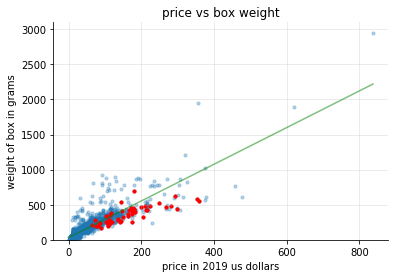

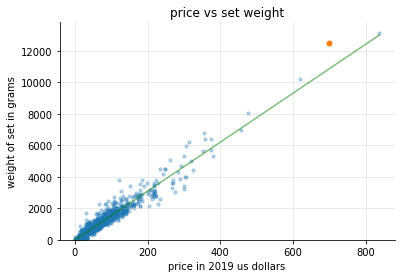

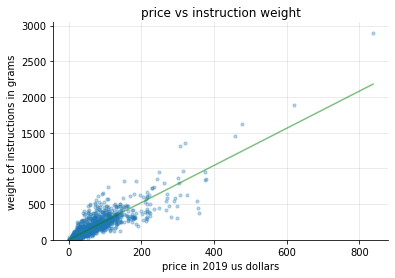

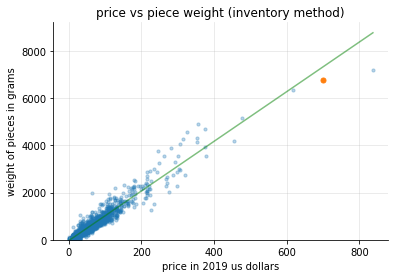

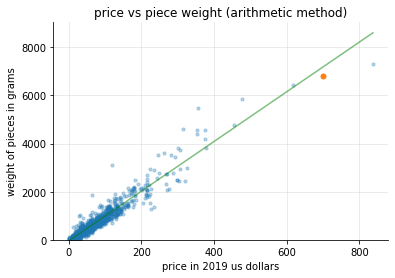

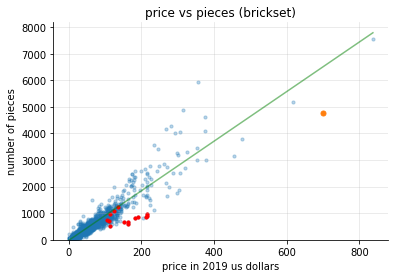

In [489]:
df = df_processed.copy()
df_trains = df[
    (df['name'].str.contains('Train')) &
    (df['usprice'] >= 89.99)
]
df_creator_expert = df[df['theme'] == 'Creator Expert']


def get_callout_params(x, y, kwargs={}):
    return {
        'x': x,
        'y': y,
        'kwargs': {
            's': 25,
            'alpha': 1.0,
            **kwargs,
        }
    }

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['box_weight'],
        },
        {
            'x': df_creator_expert['adjusted_price'],
            'y': df_creator_expert['box_weight'],
            'kwargs': {'color': 'red', 's': 10}
        }
    ],
    'price vs box weight',
    'price in 2019 us dollars',
    'weight of box in grams',
)

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['set_weight'],       
        }, 
        get_callout_params([699.99], [12500.0]),
    ],
    'price vs set weight',
    'price in 2019 us dollars',
    'weight of set in grams',
)

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['instruction_weight'],        
        },
    ],
    'price vs instruction weight',
    'price in 2019 us dollars',
    'weight of instructions in grams',
)


scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['parts_weight_inv'],
        },
        get_callout_params([699.99], [6781.0]),
    ],
    'price vs piece weight (inventory method)',
    'price in 2019 us dollars',
    'weight of pieces in grams',
)

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['parts_weight_est'],
        },
        get_callout_params([699.99], [6800.0]),
    ],
    'price vs piece weight (arithmetic method)',
    'price in 2019 us dollars',
    'weight of pieces in grams',
)

scatter_plot(
    [
        {
            'x': df['adjusted_price'],
            'y': df['pieces'],
        },
        get_callout_params([699.99], [4782.0]),
        {
            'x': df_trains['adjusted_price'],
            'y': df_trains['pieces'],
            'kwargs': {'color': 'red', 's': 10}
        }
    ],
    'price vs pieces (brickset)',
    'price in 2019 us dollars',
    'number of pieces',
)

In [491]:
with pd.option_context('display.max_rows', None):
    display(df[df['adjusted_price'] > 300])

,number,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,num_part_types,...,theme_The Lone Ranger,theme_The Lord of the Rings,theme_The Simpsons,theme_Toy Story,theme_Trains,theme_Ultra Agents,theme_Unikitty,theme_Vikings,theme_World Racers,theme
0,10143-1,2005,Death Star II,0.0,3441.0,269.99,6811.0,1953.0,443.0,148.0,...,0,0,0,0,0,0,0,0,0,Star Wars
218,10179-1,2007,Ultimate Collector's Millennium Falcon,5.0,5197.0,499.99,10214.9,1890.0,1893.0,292.0,...,0,0,0,0,0,0,0,0,0,Star Wars
334,10188-1,2008,Death Star,24.0,3803.0,399.99,8060.0,608.0,1616.4,501.0,...,0,0,0,0,0,0,0,0,0,Star Wars
335,10189-1,2008,Taj Mahal,0.0,5922.0,299.99,6402.0,555.0,370.0,174.0,...,0,0,0,0,0,0,0,0,0,Creator Expert
562,10212-1,2010,Imperial Shuttle,5.0,2503.0,259.99,3985.0,424.0,623.0,251.0,...,0,0,0,0,0,0,0,0,0,Star Wars
683,10221-1,2011,Super Star Destroyer,5.0,3152.0,399.99,6965.0,762.0,1450.0,198.0,...,0,0,0,0,0,0,0,0,0,Star Wars
1034,10234-1,2013,Sydney Opera House,0.0,2989.0,319.99,5670.0,586.0,539.0,235.0,...,0,0,0,0,0,0,0,0,0,Creator Expert
1226,75059-1,2014,Sandcrawler,14.0,3296.0,299.99,4437.0,830.0,629.0,325.0,...,0,0,0,0,0,0,0,0,0,Star Wars
1470,76042-1,2015,The SHIELD Helicarrier,17.0,2996.0,349.99,5300.0,615.0,852.0,516.0,...,0,0,0,0,0,0,0,0,0,Marvel Super Heroes
1780,71040-1,2016,Disney Castle,7.0,4080.0,349.99,5700.0,573.0,952.0,686.0,...,0,0,0,0,0,0,0,0,0,Disney


In [280]:
def year_plot(df, col, title='', y_label=''):
    plt.plot(
        df.index,
        df[col],
    )
    plt.ylim(ymin=0)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    plt.ylabel(y_label)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.grid(axis='y', alpha=0.3)
    plt.show()

In [660]:
df_ratios = df_merged.copy()
df_ratios['piece_weight_to_price'] = df_ratios['adjusted_price'] / df_ratios['parts_weight_est']
df_ratios['pieces_to_price'] = df_ratios['adjusted_price'] / df_ratios['pieces']
df_ratios['average_piece_weight'] = df_ratios['parts_weight_est'] / df_ratios['pieces']
df_ratios['average_piece_weight_inv'] = df_ratios['parts_weight_inv'] / df_ratios['pieces']
df_ratios['year'] = df_ratios['year'].astype(int)

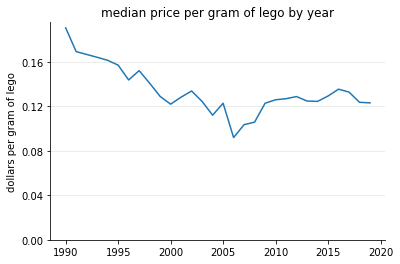

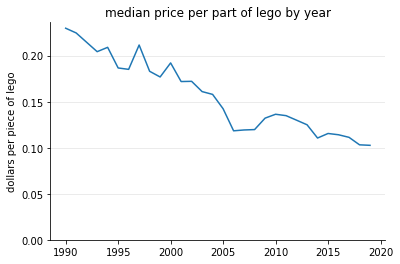

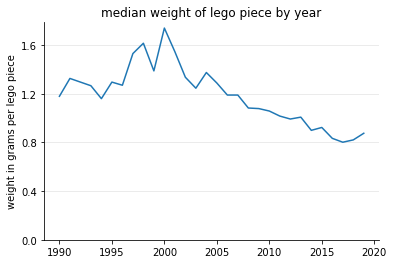

In [662]:
df_year = df_ratios.groupby('year')[[
    'piece_weight_to_price',
    'pieces_to_price',
    'pieces',
    'parts_weight_est',
    'adjusted_price',
    'average_piece_weight',
    'average_part_types',
    'average_piece_weight_inv'
]].median()

df_year = df_year[df_year.index >= 1990]
year_plot(
    df_year, 
    'piece_weight_to_price',
    'median price per gram of lego by year',
    'dollars per gram of lego'
)
year_plot(
    df_year,
    'pieces_to_price',
    'median price per part of lego by year',
    'dollars per piece of lego'
)
year_plot(
    df_year, 
    'average_piece_weight',
    'median weight of lego piece by year',
    'weight in grams per lego piece'
)

how did we get here?

- stud muffin bricks on instagram
- http://anjsbrickblog.blogspot.com/2018/12/lego-star-wars-2019-ucs-set-details.html
- https://www.reddit.com/r/lego/comments/ae00sb/2019_d2c_set_list_posted_on_eurobricks/
- https://www.eurobricks.com/forum/index.php?/forums/topic/120925-fairground-sets-rumours-and-discussion/&page=20
- https://www.eurobricks.com/forum/index.php?/forums/topic/167577-lego-star-wars-2019-set-discussion-read-first-post/&page=52


appendix 1: merge brickset year csvs (not necessary to run analysis)

In [37]:
import os

brickset_path = 'sets-brickset'
list_dfs_brickset = []

for filename in os.listdir(brickset_path):
    list_dfs_brickset.append(
        pd.read_csv(os.path.join(brickset_path, filename))
    )

df_sets_brickset = pd.concat(list_dfs_brickset, ignore_index=True)

In [32]:
df_sets_brickset.to_csv('sets-brickset.csv', index=False)

appendix 2: getting the set weight (not necessary to run analysis)

In [27]:
# make a dict of part weights
df_part_weights = pd.read_csv('parts-bricklink.tsv', sep='\t')
dict_part_weights = {
    number: float(weight) for number, weight in zip(
        df_part_weights['Number'].tolist(),
        df_part_weights['Weight (in Grams)'].tolist()
    ) if weight != '?'
}

In [494]:
# get isd weight
df_isd_parts = pd.read_csv('set-inventories/75252-1.tsv', sep='\t')
df_isd_parts['part_weight'] = [
    dict_part_weights[x] if x in dict_part_weights else 0.0 for x in df_isd_parts['Type'].tolist()
]
isd_weight = sum(df_isd_parts['Item Name'] * df_isd_parts['part_weight'])
print(isd_weight)
print(isd_weight/4782)

6781.290999999996
1.4180867837724793


In [29]:
# validate this works with a known set
df_mf_parts = pd.read_csv('set-inventories/75192-1.tsv', sep='\t')
df_mf_parts['part_weight'] = [
    dict_part_weights[x] if x in dict_part_weights else 0.0 for x in df_mf_parts['Type'].tolist()
]
sum(df_mf_parts['Item Name'] * df_mf_parts['part_weight'])

7210.767999999998

appendix 3: computing inventory-derived attributes for all sets (not necessary to run analysis)

In [86]:
# computing additional set-level attributes

import os

sync_directory = 'set-inventories'
synced_sets = {s.split(".")[0] for s in os.listdir(sync_directory)}

In [89]:
def get_set_attributes(set_number):
    df = pd.read_csv(f'set-inventories/{set_number}.tsv', sep='\t', encoding='utf-8', index_col=False)
    df['Item No'] = df['Item No'].astype(str)
    num_part_types = len(df)
    num_parts = df['Qty'].sum()
    parts_weight = sum([ 
        dict_part_weights[part] * float(qty) if part in dict_part_weights else 0.0
        for part, qty in zip(df['Item No'].tolist(), df['Qty'].tolist())
    ])
    num_missing_parts = sum([
        qty if (part not in dict_part_weights) and ('stk' not in part) else 0.0 
        for part, qty in zip(df['Item No'].tolist(), df['Qty'].tolist())
    ])
    pct_missing_parts = num_missing_parts / num_parts
    return {
        'number': set_number,
        'num_part_types': num_part_types,
        'num_parts': num_parts,
        'parts_weight': parts_weight,
        'num_missing_parts': num_missing_parts,
        'pct_missing_parts': pct_missing_parts,
    }

fails = 0
inventory_data = []
for s in synced_sets:
    try:
        inventory_data.append(get_set_attributes(s))
    except:
        fails += 1
        if fails % 100 == 0:
            print(f'{fails} loads failed')

print(f'failed on {fails} sets')

# I believe almost all load fails are from html error pages when a set is not found

100 loads failed
200 loads failed
300 loads failed
400 loads failed
500 loads failed
600 loads failed
700 loads failed
800 loads failed
900 loads failed
1000 loads failed
1100 loads failed
1200 loads failed
1300 loads failed
1400 loads failed
1500 loads failed
1600 loads failed
1700 loads failed
1800 loads failed
1900 loads failed
2000 loads failed
failed on 2065 sets


In [92]:
cols = [
    'number',
    'num_part_types',
    'num_parts',
    'parts_weight',
    'num_missing_parts',
    'pct_missing_parts'
]
dict_cols = {}

for c in cols:
    dict_cols[c] = [s[c] for s in inventory_data]

df_inv = pd.DataFrame(dict_cols)
df_inv.to_csv('sets-bricklink-inventory-derived.csv', index=False)